[1 4 4 5 7 7 7]
[-2 -5 -1 -2 -7  1  1]


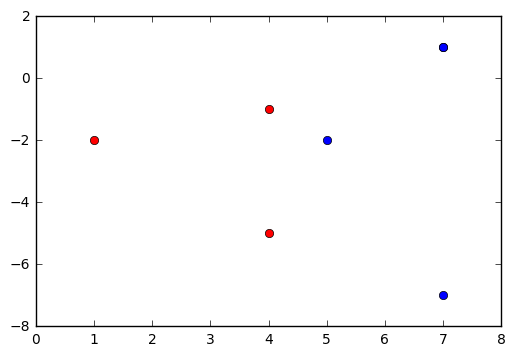

In [14]:
import numpy as np
x1 = np.array([1,0,0,-1,0,0,-2])
x2 = np.array([0,1,-1,0,2,-2,0])
y = np.array([-1,-1,-1,1,1,1,1])

R1 = x2*x2 - 2*x1 + 3
R2 = x1*x1 - 2*x2 - 3

for i in range(len(y)):
    if y[i] == -1:
        plt.plot(R1[i],R2[i], 'or')
    else:
        plt.plot(R1[i],R2[i], 'ob')
        
print(R1)
print(R2)
plt.xlim(0, 8)
plt.ylim(-8, 2)
plt.show()

In [100]:
# %cd F://program//cvxopt-master
# %run setup.py install

In [99]:
from sklearn.svm import SVC
from math import pow
import random

def load_data(input_file):
    f = open(input_file)
    X = []
    Y = []
    for line in f:
        strs = line.split()
        Y.append(float(strs[0]))
        x = [float(v) for v in strs[1:]]
        X.append(x)
    return X, Y

def sign(x):
    if x > 0:
        return 1
    else: 
        return -1

def calculate_error(Y_1, Y_2):
    n = len(Y_2)
    count = 0
    for i in range(len(Y_2)):
        if Y_1[i] != Y_2[i]:
            count = count + 1
    return count / n

def to_perceptron(Y):
    Y_temp = []
    for k in range(len(Y)):
        if Y[k] == 0:
            Y_temp.append(1)
        else: 
            Y_temp.append(-1)
    return Y_temp
    
TRAIN_DATA = 'train_data.dat'
TEST_DATA = 'test_data.dat'

def main():
    X_train, Y_train = load_data(TRAIN_DATA)
    X_test, Y_test = load_data(TEST_DATA)
    
    # train it as 0 and non-0
    Y_temp_train = to_perceptron(Y_train)
    Y_temp_test = to_perceptron(Y_test)
    
    C = [pow(10, v) for v in [-1]]
    print(C)
    gamma = [pow(10, v) for v in [0, 1, 2, 3]]
    E_cv_best = 1
    gamma_best = 0
    indexs = [i for i in range(len(Y_train))]
    for i in range(len(gamma)):
        print(i)
        E_sum = 0
        for j in range(100):
            # question 15
            # clf = SVC(C = C[i], kernel = 'linear', shrinking = False)
            # question 16
            # clf = SVC(C = C[i], kernel = 'poly', degree = 2, shrinking = False)
            # question 18
            # clf = SVC(C = C[i], kernel = 'rbf', gamma = 100, shrinking = False)
            # question 19
            clf = SVC(C = 0.1, kernel = 'rbf', gamma = gamma[i], shrinking = False)
            random.shuffle(indexs)
            X_sample = [X_train[m] for m in indexs[:1000]]
            Y_sample = [Y_temp_train[m] for m in indexs[:1000]]
            X_val = [X_train[m] for m in indexs[1000:]]
            Y_val = [Y_temp_train[m] for m in indexs[1000:]]
            
            clf.fit(np.array(X_sample), np.array(Y_sample))
            Y_result = clf.predict(np.array(X_val))
            E_val = calculate_error(Y_result, Y_val)
            E_sum = E_sum + E_val
            # print (np.sum(clf.n_support_))
            # print (Eout)
            # print (np.abs(clf.decision_function(clf.support_vectors_[0])))
            # print(np.linalg.norm(clf.coef_))
            # question 17
            # print(Ein)
            # sum_alpha
            # print(np.sum(np.abs(clf.dual_coef_)))
        E_cv = E_sum / 100
        print (E_cv)
        # choose best gamma according to E_val
        if E_cv < E_cv_best:
            E_cv_best = E_cv
            gamma_best = gamma[i]
    print(E_cv_best)
    print(gamma_best)
            
        
    
if __name__ == '__main__':
    main()

[0.1]
0
0.1618963598791925
1
0.13187251629311714
2
0.1637323160069941
3
0.16357176919408672
0.13187251629311714
10.0
